In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the dataset to check the first few rows and understand its structure
file_path = '/content/Covid19 India (Jan 20 - Mar 20).csv'
df = pd.read_csv(file_path)
df.head()


,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30-01-2020,Kerala,1,0,0,0
1,2,31-01-2020,Kerala,1,0,0,0
2,3,01-02-2020,Kerala,2,0,0,0
3,4,02-02-2020,Kerala,3,0,0,0
4,5,03-02-2020,Kerala,3,0,0,0


In [25]:
# Basic statistical summary of the numerical columns
summary_stats = df.describe()

In [27]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

Sno                         0
Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
dtype: int64

Text(0.5, 1.0, 'Total COVID-19 Cases Over Time')

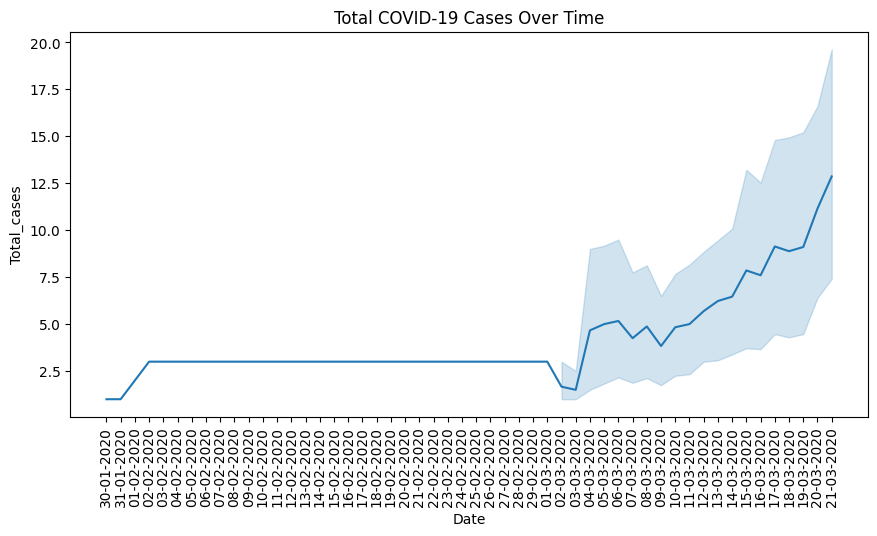

In [31]:
# Visualizing the data to understand the distribution and trends
plt.figure(figsize=(35, 5))

# Total cases over time
plt.subplot(1, 3, 1)
df['Total_cases'] = df['ConfirmedIndianNational'] + df['ConfirmedForeignNational']
sns.lineplot(x='Date', y='Total_cases', data=df)
plt.xticks(rotation=90)
plt.title('Total COVID-19 Cases Over Time')

Text(0.5, 1.0, 'Cured COVID-19 Cases Over Time')

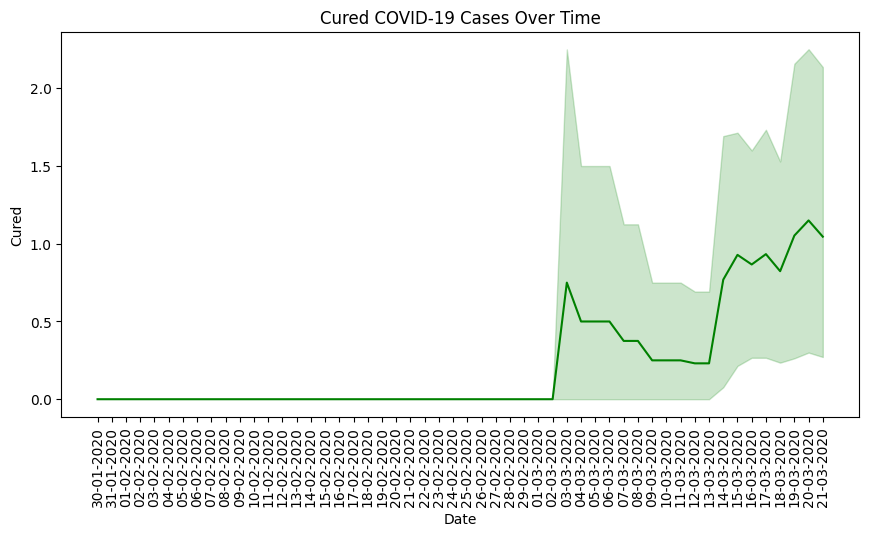

In [34]:
plt.figure(figsize=(35, 5))
# Cured cases over time
plt.subplot(1, 3, 2)
sns.lineplot(x='Date', y='Cured', data=df, color='green')
plt.xticks(rotation=90)
plt.title('Cured COVID-19 Cases Over Time')

Text(0.5, 1.0, 'COVID-19 Deaths Over Time')

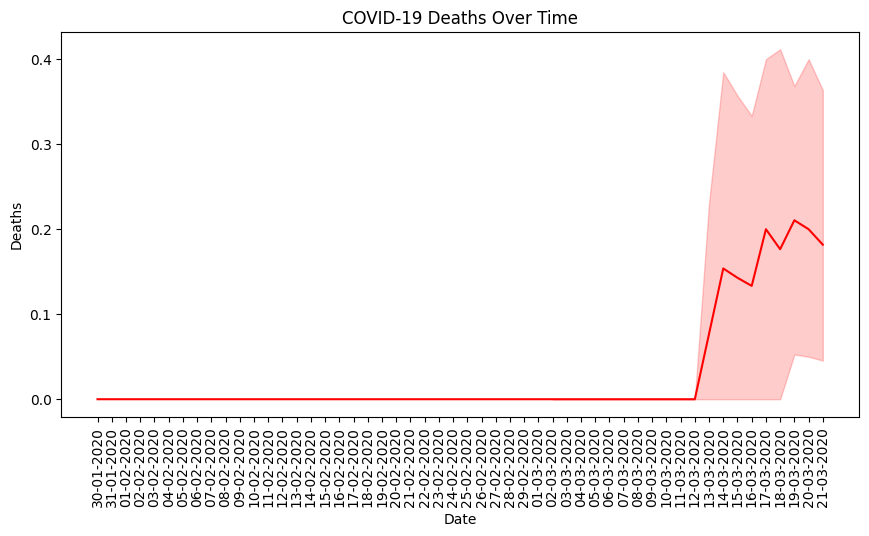

In [35]:
plt.figure(figsize=(35, 5))
# Deaths over time
plt.subplot(1, 3, 3)
sns.lineplot(x='Date', y='Deaths', data=df, color='red')
plt.xticks(rotation=90)
plt.title('COVID-19 Deaths Over Time')

In [37]:
# Preprocess the data
# Create a new feature called 'Total_cases'
df['Total_cases'] = df['ConfirmedIndianNational'] + df['ConfirmedForeignNational']

# Normalize the 'Total_cases' feature
df['Total_cases_normalized'] = (df['Total_cases'] - df['Total_cases'].mean()) / df['Total_cases'].std()

# Use 'Cured' as the target variable
target = df['Cured']

In [38]:
# Split the data into train and validation sets
train_features, val_features, train_target, val_target = train_test_split(
    df[['Total_cases_normalized']], target, test_size=0.2, random_state=42
)

# Convert the train and validation sets to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_features.values, train_target.values))
validation_dataset = tf.data.Dataset.from_tensor_slices((val_features.values, val_target.values))

# Batch and shuffle the train dataset
train_dataset = train_dataset.batch(8).shuffle(buffer_size=len(train_target))

# Batch the validation dataset
validation_dataset = validation_dataset.batch(8)

In [39]:
# Build a simple TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(train_features.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

# Evaluate the model on the validation set
loss = model.evaluate(validation_dataset)
print('Validation loss (MSE):', loss)

Epoch 1/10
27/27 [==============================] - 1s 6ms/step - loss: 2.4743 - val_loss: 0.8608
Epoch 2/10
27/27 [==============================] - 0s 2ms/step - loss: 2.2712 - val_loss: 0.7855
Epoch 3/10
27/27 [==============================] - 0s 3ms/step - loss: 2.2233 - val_loss: 0.7776
Epoch 4/10
27/27 [==============================] - 0s 3ms/step - loss: 2.1221 - val_loss: 0.8188
Epoch 5/10
27/27 [==============================] - 0s 2ms/step - loss: 2.0577 - val_loss: 0.8638
Epoch 6/10
27/27 [==============================] - 0s 2ms/step - loss: 1.9953 - val_loss: 0.8731
Epoch 7/10
27/27 [==============================] - 0s 3ms/step - loss: 1.9705 - val_loss: 0.9149
Epoch 8/10
27/27 [==============================] - 0s 2ms/step - loss: 1.9410 - val_loss: 0.9506
Epoch 9/10
27/27 [==============================] - 0s 2ms/step - loss: 1.9126 - val_loss: 0.9786
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 1.0015
Validation loss (MSE): 1.001491069793701

In [40]:
# Make predictions on the validation set
predictions = model.predict(validation_dataset)

7/7 [==============================] - 0s 2ms/step


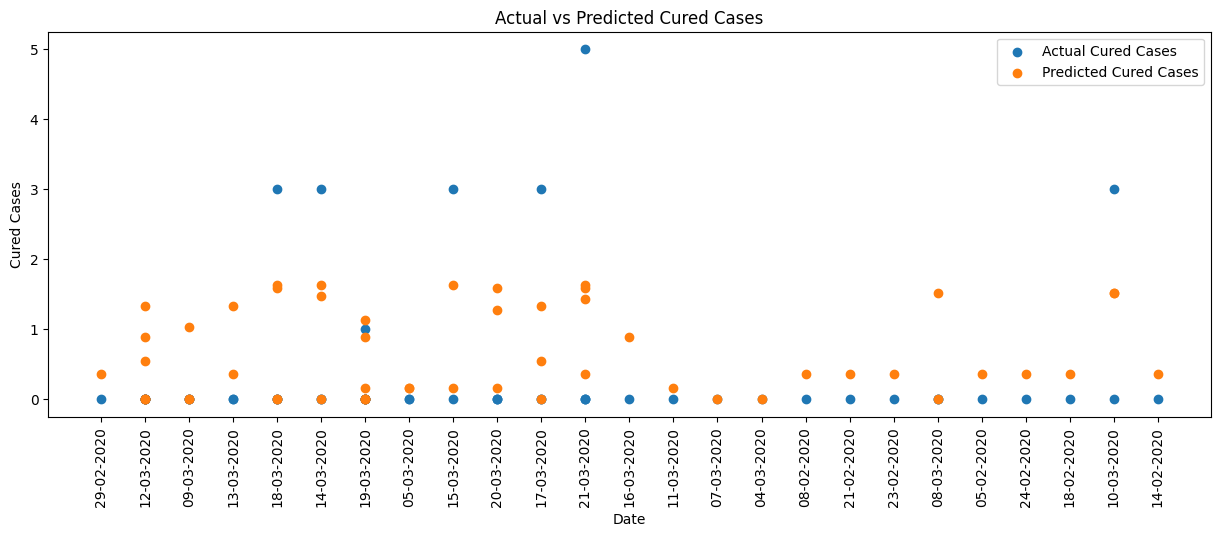

In [41]:
# Plot the predictions against the actual values
val_dates = df.loc[val_features.index, 'Date']
plt.figure(figsize=(15, 5))
plt.scatter(val_dates, val_target, label='Actual Cured Cases')
plt.scatter(val_dates, predictions, label='Predicted Cured Cases')
plt.legend()
plt.title('Actual vs Predicted Cured Cases')
plt.xlabel('Date')
plt.ylabel('Cured Cases')
plt.xticks(rotation=90)
plt.show()
